### 总体板块

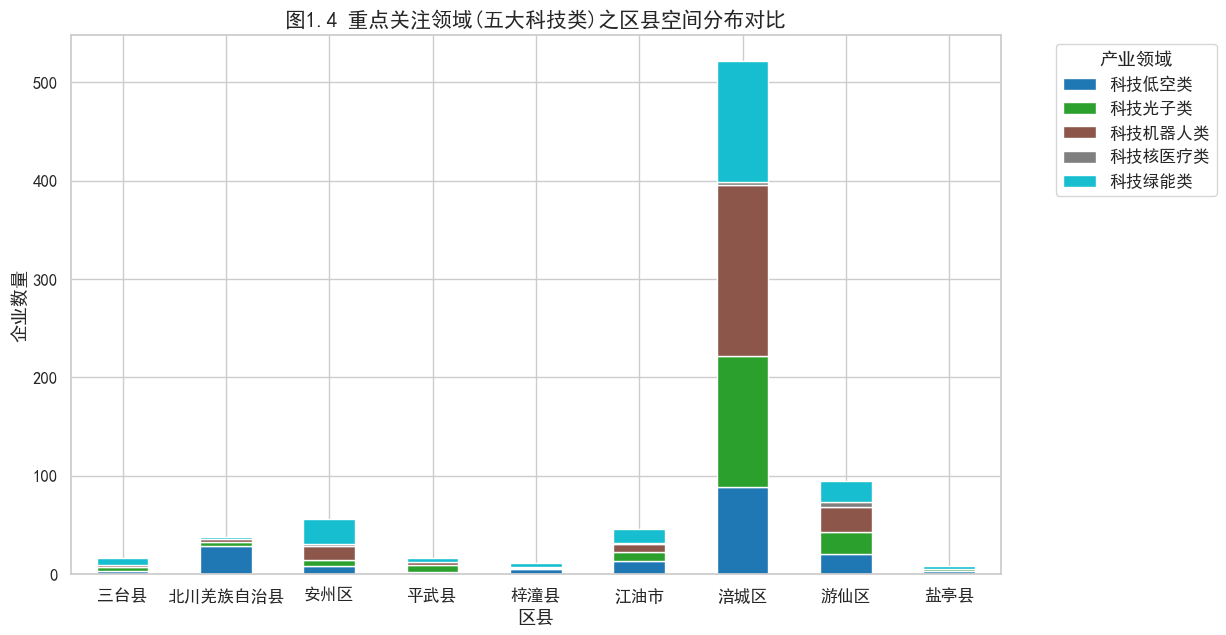

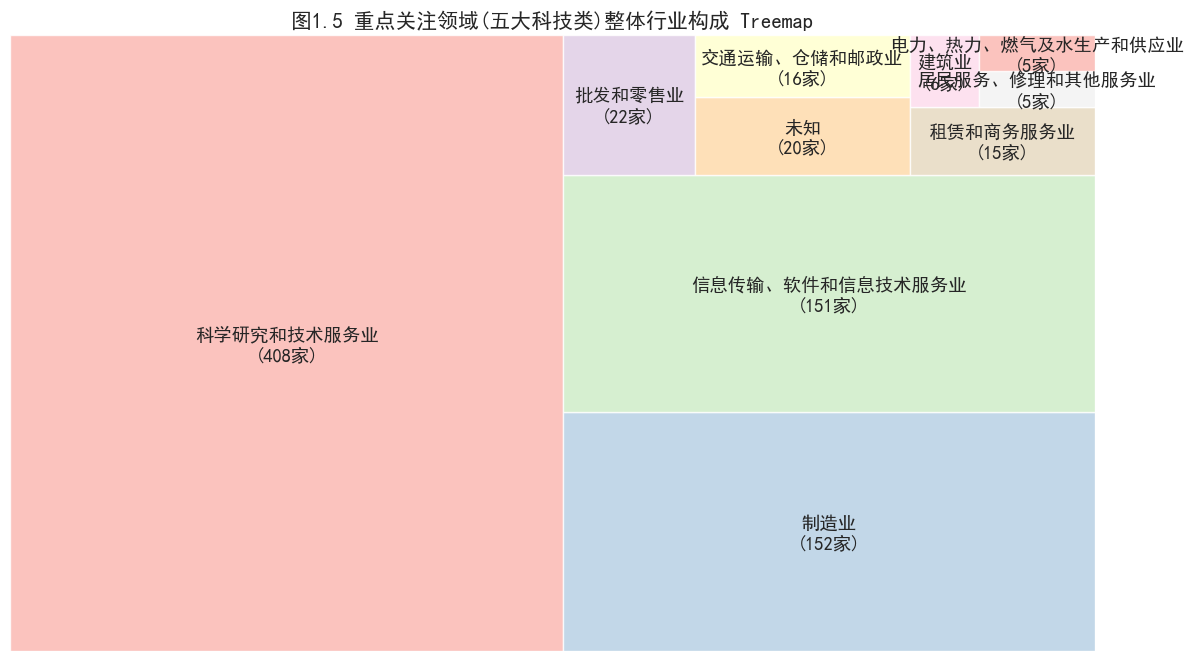


⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
🚀 重点领域专项洞察：
- 【科技光子类】: 共有企业 189 家，核心聚集于 涪城区。
- 【科技低空类】: 共有企业 173 家，核心聚集于 涪城区。
- 【科技绿能类】: 共有企业 204 家，核心聚集于 涪城区。
- 【科技核医疗类】: 共有企业 11 家，核心聚集于 游仙区。
- 【科技机器人类】: 共有企业 231 家，核心聚集于 涪城区。
⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐


In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 

# 1. 基础配置
DATA_DIR = r"D:\1.专利数据\循环设计样本数据\元数据\行业指标合并结果\绵阳筛选结果_含原始重复"
SPECIAL_5 = ["科技光子类", "科技低空类", "科技绿能类", "科技核医疗类", "科技机器人类"]
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

def run_plate_1a_special_focus():
    all_files = [f for f in os.listdir(DATA_DIR) if f.endswith(".xlsx") and not f.startswith("~$")]
    all_dfs = []
    
    # 汇总所有数据
    for file in all_files:
        cat_name = file.replace(".xlsx", "")
        df_tmp = pd.read_excel(os.path.join(DATA_DIR, file))
        df_tmp['所属产业集群'] = cat_name
        all_dfs.append(df_tmp)
    
    df_all = pd.concat(all_dfs, ignore_index=True)
    
    # --- 核心逻辑：提取重点五大类子集 ---
    df_special = df_all[df_all['所属产业集群'].isin(SPECIAL_5)].copy()
    
    # 数据清洗：提取区县和主营行业
    df_special['区县'] = df_special['公司所在地'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else "未知")
    df_special['主营行业'] = df_special['国标行业'].apply(
        lambda x: str(x).replace('，', ',').split(',')[0].strip() if pd.notnull(x) and str(x).strip() != "" else "未知"
    )

    # --- 图 1.4：重点领域地理分布 (堆叠柱状图) ---
    # 目的：看这五个类分别在哪个区县最集中
    geo_data = df_special.groupby(['区县', '所属产业集群']).size().unstack().fillna(0)
    plt.figure(figsize=(12, 7))
    geo_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
    plt.title("图1.4 重点关注领域(五大科技类)之区县空间分布对比", fontsize=15, fontweight='bold')
    plt.ylabel("企业数量")
    plt.xticks(rotation=0)
    plt.legend(title="产业领域", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # --- 图 1.5：重点领域行业分布 Treemap ---
    # 目的：看这五个类组合在一起后，主营业务的构成
    ind_data = df_special['主营行业'].value_counts().head(10)
    plt.figure(figsize=(14, 8))
    labels = [f'{n}\n({v}家)' for n, v in zip(ind_data.index, ind_data.values)]
    squarify.plot(sizes=ind_data.values, label=labels, alpha=0.8, color=sns.color_palette("Pastel1", len(ind_data)))
    plt.axis('off')
    plt.title("图1.5 重点关注领域(五大科技类)整体行业构成 Treemap", fontsize=15, fontweight='bold')
    plt.show()

    # --- 结论打印测试 ---
    print("\n" + "⭐"*20)
    print("🚀 重点领域专项洞察：")
    for cat in SPECIAL_5:
        sub = df_special[df_special['所属产业集群'] == cat]
        if not sub.empty:
            top_district = sub['区县'].value_counts().index[0]
            print(f"- 【{cat}】: 共有企业 {len(sub)} 家，核心聚集于 {top_district}。")
    print("⭐"*20)

# 执行测试
run_plate_1a_special_focus()

🚀 正在聚合绵阳全市 16 个产业数据集...


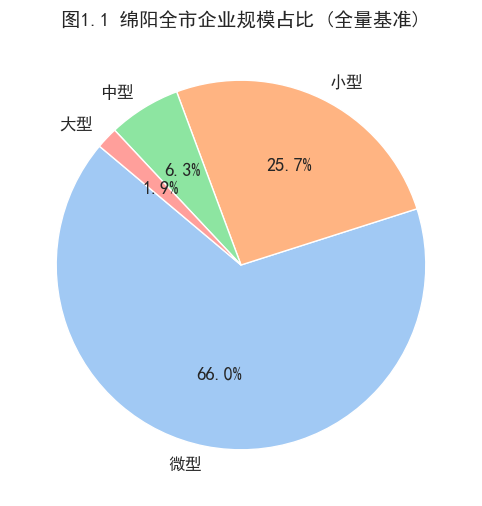

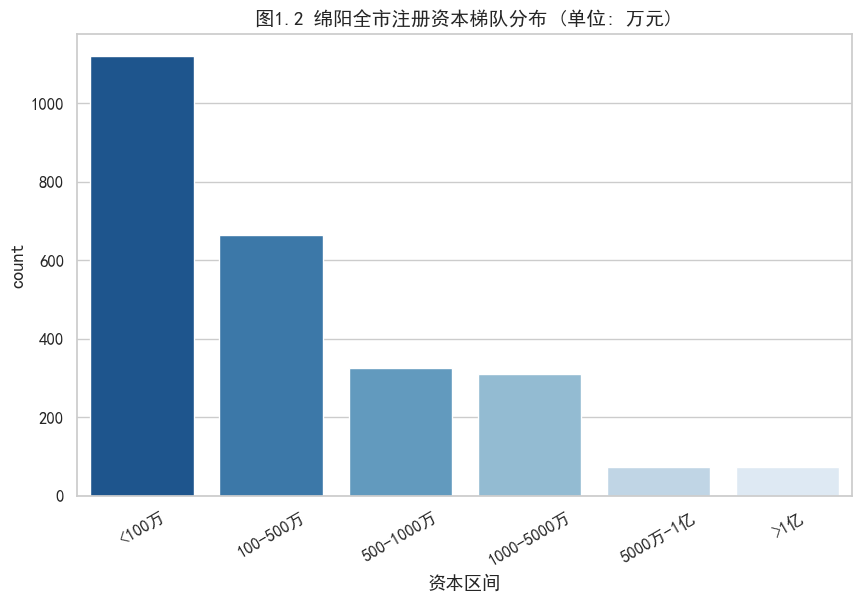

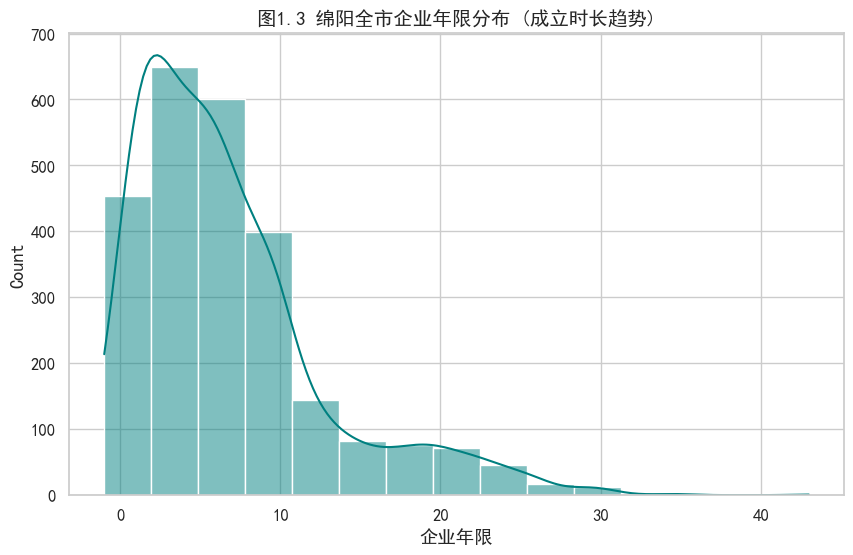

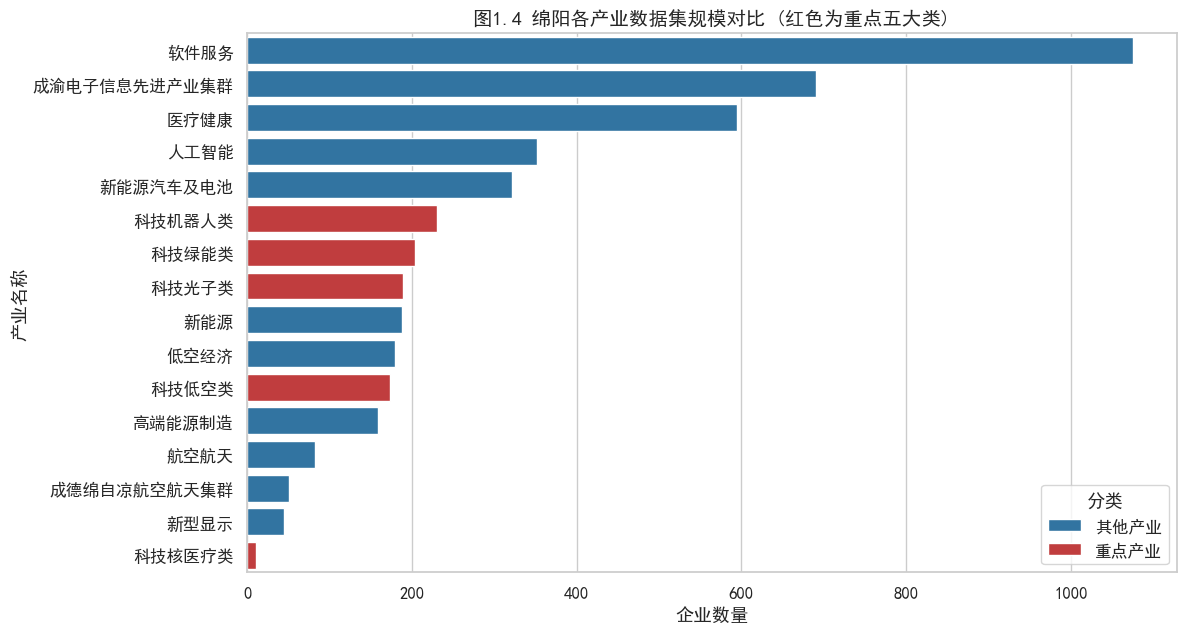

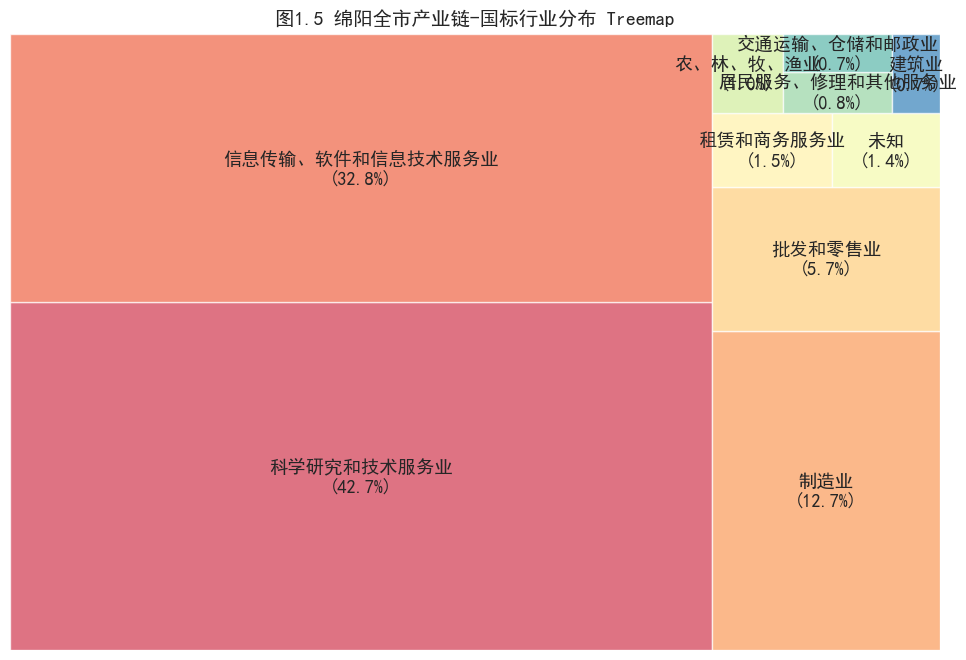

C:\Users\21310\AppData\Local\Temp\ipykernel_35680\1981092896.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reg_all.values, y=reg_all.index, palette='viridis')


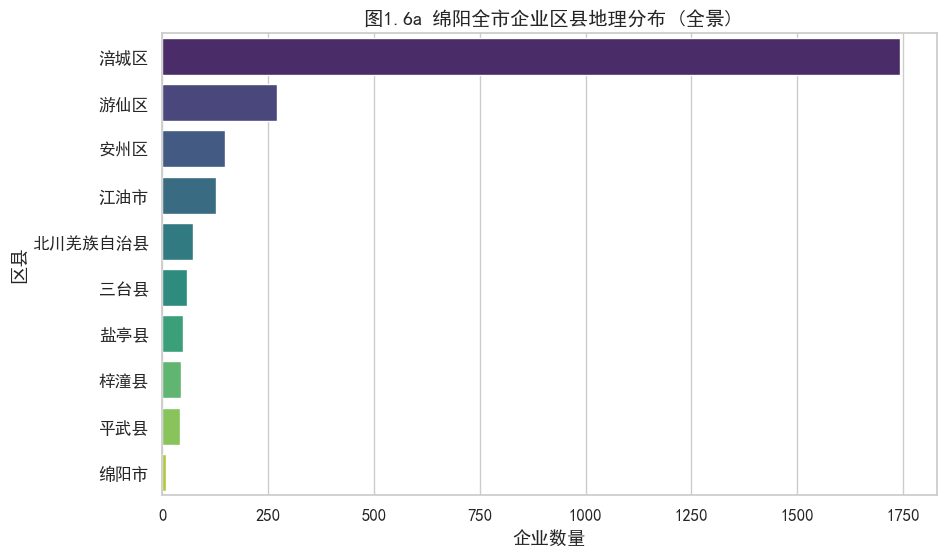

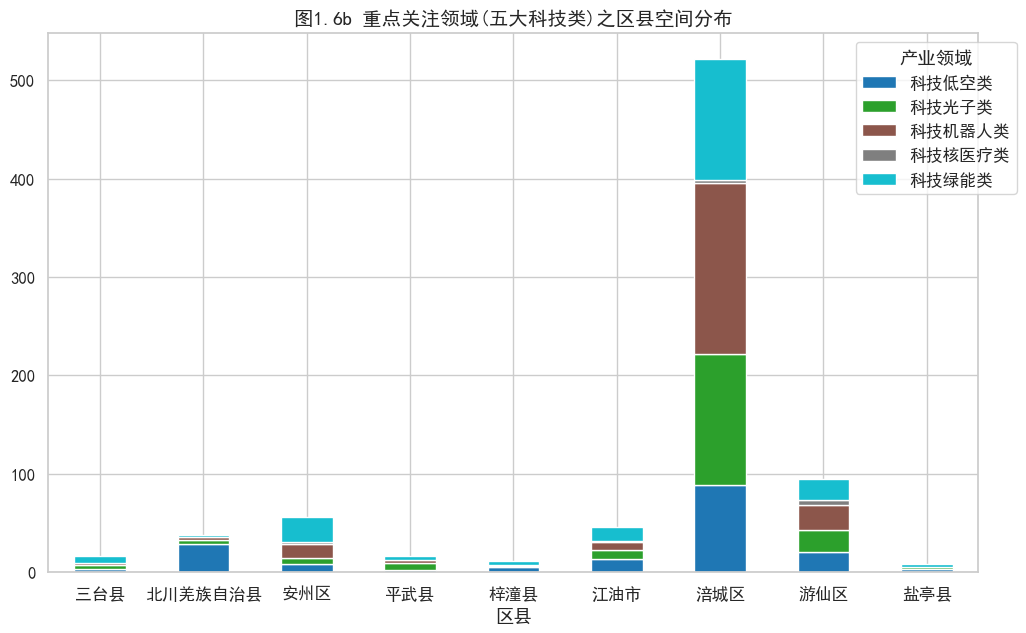

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

# 1. 基础配置
# 请确保该路径下包含所有 11 个 Excel 文件
DATA_DIR = r"D:\1.专利数据\循环设计样本数据\元数据\行业指标合并结果\绵阳筛选结果_含原始重复"
SPECIAL_5 = ["科技光子类", "科技低空类", "科技绿能类", "科技核医疗类", "科技机器人类"]

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

def run_plate_1a_v2_test():
    all_files = [f for f in os.listdir(DATA_DIR) if f.endswith(".xlsx") and not f.startswith("~$")]
    all_dfs = []
    file_counts = []

    print(f"🚀 正在聚合绵阳全市 {len(all_files)} 个产业数据集...")

    for file in all_files:
        cat_name = file.replace(".xlsx", "")
        # 处理读取权限问题，建议关闭 Excel
        df_tmp = pd.read_excel(os.path.join(DATA_DIR, file))
        
        # 统计单文件去重企业数
        unique_count = df_tmp['公司名称'].nunique()
        is_special = "重点产业" if cat_name in SPECIAL_5 else "其他产业"
        file_counts.append({"产业名称": cat_name, "企业数量": unique_count, "分类": is_special})
        
        df_tmp['所属产业集群'] = cat_name
        all_dfs.append(df_tmp)
    
    # 全市去重企业数据集 (用于 1.1-1.3, 1.5, 1.6a)
    df_raw_all = pd.concat(all_dfs, ignore_index=True)
    df_mianyang = df_raw_all.drop_duplicates(subset=['公司名称']).copy()

    # --- 数据预处理 ---
    df_mianyang['注册资本_f'] = pd.to_numeric(df_mianyang['注册资本'], errors='coerce').fillna(0) / 10000 
    df_mianyang['成立日期'] = pd.to_datetime(df_mianyang['成立日期'], errors='coerce')
    df_mianyang['企业年限'] = df_mianyang['成立日期'].apply(lambda x: 2024 - x.year if pd.notnull(x) else np.nan)
    df_mianyang['区县'] = df_mianyang['公司所在地'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else "未知")
    df_mianyang['主营行业'] = df_mianyang['国标行业'].apply(lambda x: str(x).replace('，', ',').split(',')[0].strip() if pd.notnull(x) else "未知")

    # ================== Part 1: 宏观基准 (全市视角) ==================
    
    # 图 1.1 企业规模占比
    plt.figure(figsize=(8, 6))
    scale_counts = df_mianyang['企业划型名称'].value_counts()
    plt.pie(scale_counts, labels=scale_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('图1.1 绵阳全市企业规模占比 (全量基准)', fontsize=14, fontweight='bold')
    plt.show()

    # 图 1.2 注册资本梯队分布
    plt.figure(figsize=(10, 6))
    bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
    labels = ['<100万', '100-500万', '500-1000万', '1000-5000万', '5000万-1亿', '>1亿']
    df_mianyang['资本区间'] = pd.cut(df_mianyang['注册资本_f'], bins=bins, labels=labels, include_lowest=True)
    sns.countplot(x='资本区间', data=df_mianyang, palette='Blues_r', hue='资本区间', legend=False)
    plt.title('图1.2 绵阳全市注册资本梯队分布 (单位: 万元)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=30)
    plt.show()

    # 图 1.3 企业年限分布
    plt.figure(figsize=(10, 6))
    sns.histplot(df_mianyang['企业年限'].dropna(), bins=15, kde=True, color='teal')
    plt.title('图1.3 绵阳全市企业年限分布 (成立时长趋势)', fontsize=14, fontweight='bold')
    plt.show()

    # ================== Part 2: 产业对比与下钻 ==================

    # 图 1.4 各数据集对比
    df_file_counts = pd.DataFrame(file_counts).sort_values("企业数量", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(data=df_file_counts, x="企业数量", y="产业名称", hue="分类", dodge=False, palette={"重点产业": "#d62728", "其他产业": "#1f77b4"})
    plt.title("图1.4 绵阳各产业数据集规模对比 (红色为重点五大类)", fontsize=14, fontweight='bold')
    plt.show()

    # 图 1.5 全市行业分布 Treemap
    ind_data = df_mianyang['主营行业'].value_counts().head(10)
    plt.figure(figsize=(12, 8))
    tm_labels = [f'{n}\n({v/ind_data.sum():.1%})' for n, v in zip(ind_data.index, ind_data.values)]
    squarify.plot(sizes=ind_data.values, label=tm_labels, alpha=0.7, color=sns.color_palette("Spectral", len(ind_data)))
    plt.axis('off')
    plt.title("图1.5 绵阳全市产业链-国标行业分布 Treemap", fontsize=14, fontweight='bold')
    plt.show()

    # 图 1.6 全市地理分布 (a: 全市概览; b: 重点专项下钻)
    
    # 1.6a: 全市地理分布
    plt.figure(figsize=(10, 6))
    reg_all = df_mianyang['区县'].value_counts()
    sns.barplot(x=reg_all.values, y=reg_all.index, palette='viridis')
    plt.title("图1.6a 绵阳全市企业区县地理分布 (全景)", fontsize=14, fontweight='bold')
    plt.xlabel("企业数量")
    plt.show()

    # 1.6b: 五大科技类专项下钻
    df_special = df_raw_all[df_raw_all['所属产业集群'].isin(SPECIAL_5)].copy()
    df_special['区县'] = df_special['公司所在地'].apply(lambda x: str(x).split(',')[-1].strip() if pd.notnull(x) else "未知")
    geo_spec = df_special.groupby(['区县', '所属产业集群']).size().unstack().fillna(0)
    
    plt.figure(figsize=(12, 7))
    geo_spec.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
    plt.title("图1.6b 重点关注领域(五大科技类)之区县空间分布", fontsize=14, fontweight='bold')
    plt.xticks(rotation=0)
    plt.legend(title="产业领域", bbox_to_anchor=(1.05, 1))
    plt.show()

# 执行完整测试
run_plate_1a_v2_test()

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

# 1. 基础配置
DATA_DIR = r"D:\1.专利数据\循环设计样本数据\元数据\行业指标合并结果\绵阳筛选结果_含原始重复"
SPECIAL_5 = ["科技光子类", "科技低空类", "科技绿能类", "科技核医疗类", "科技机器人类"]
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

def run_plate_1a_v3_comprehensive():
    all_files = [f for f in os.listdir(DATA_DIR) if f.endswith(".xlsx") and not f.startswith("~$")]
    all_dfs = []
    cluster_metrics = []

    print(f"🚀 正在聚合全市 {len(all_files)} 个集群数据，并计算【规模-专利-资质】多维实力指标...")

    for file in all_files:
        cat_name = file.replace(".xlsx", "")
        df_tmp = pd.read_excel(os.path.join(DATA_DIR, file))
        
        # 预清洗：转换为数值
        df_tmp['专利数量_f'] = pd.to_numeric(df_tmp['专利数量'], errors='coerce').fillna(0)
        df_tmp['资质总量_f'] = pd.to_numeric(df_tmp['企业资质总量'], errors='coerce').fillna(0)
        
        # 统计集群指标
        unique_count = df_tmp['公司名称'].nunique()
        avg_patents = df_tmp['专利数量_f'].mean()
        avg_certs = df_tmp['资质总量_f'].mean()
        
        is_special = "重点产业" if cat_name in SPECIAL_5 else "其他产业"
        cluster_metrics.append({
            "产业名称": cat_name, 
            "企业数量": unique_count, 
            "平均专利数": avg_patents,
            "平均资质数": avg_certs,
            "分类": is_special
        })
        
        df_tmp['所属产业集群'] = cat_name
        all_dfs.append(df_tmp)
    
    # 全市去重企业数据集
    df_raw_all = pd.concat(all_dfs, ignore_index=True)
    df_mianyang = df_raw_all.drop_duplicates(subset=['公司名称']).copy()
    
    # ------------------ Part 1: 全市宏观基准 (1.1-1.3) ------------------
    # [此处省略图1.1-1.3的绘图代码，与前一步一致]

    # ------------------ Part 2: 产业横向实力对比 (1.4a-1.4c) ------------------
    df_metrics = pd.DataFrame(cluster_metrics)
    
    # 1.4a 企业规模对比 (已排序)
    plt.figure(figsize=(12, 6))
    df_metrics_size = df_metrics.sort_values("企业数量", ascending=False)
    sns.barplot(data=df_metrics_size, x="企业数量", y="产业名称", hue="分类", dodge=False, palette={"重点产业": "#d62728", "其他产业": "#1f77b4"})
    plt.title("图1.4a 绵阳各产业数据集企业规模对比 (红色为重点五大类)", fontsize=14, fontweight='bold')
    plt.show()

    # 1.4b 平均专利拥有量对比 (新增)
    plt.figure(figsize=(12, 6))
    df_metrics_pat = df_metrics.sort_values("平均专利数", ascending=False)
    sns.barplot(data=df_metrics_pat, x="平均专利数", y="产业名称", hue="分类", dodge=False, palette={"重点产业": "#d62728", "其他产业": "#1f77b4"})
    plt.title("图1.4b 各产业企业平均专利拥有量对比 (技术储备强度)", fontsize=14, fontweight='bold')
    plt.xlabel("平均每家企业专利数量 (件)")
    plt.show()

    # 1.4c 平均企业资质数量对比 (新增)
    plt.figure(figsize=(12, 6))
    df_metrics_cert = df_metrics.sort_values("平均资质数", ascending=False)
    sns.barplot(data=df_metrics_cert, x="平均资质数", y="产业名称", hue="分类", dodge=False, palette={"重点产业": "#d62728", "其他产业": "#1f77b4"})
    plt.title("图1.4c 各产业企业平均资质拥有量对比 (资质积累强度)", fontsize=14, fontweight='bold')
    plt.xlabel("平均每家企业资质数量 (项)")
    plt.show()

    # ------------------ Part 3: 行业与地理分析 (1.5-1.6) ------------------
    # [此处省略图1.5-1.6的绘图代码，与前一步一致]

    # --- 最终结论打印测试 ---
    top_pat_name = df_metrics_pat.iloc[0]['产业名称']
    top_cert_name = df_metrics_cert.iloc[0]['产业名称']
    print("\n" + "="*50)
    print("📊 1a 板块深度审计结论：")
    print(f"1. 技术高地：【{top_pat_name}】在平均专利储备上领先全市，展现了极强的研发密度。")
    print(f"2. 资质标杆：【{top_cert_name}】拥有最高的企业资质平均值，反映出该行业合规与资质壁垒较高。")
    print("="*50)

# 运行测试
run_plate_1a_v3_comprehensive()

### 模块2